In [1]:
%load_ext autoreload
%autoreload 2
import json
from scipy import sparse
from time import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import progress_bar
import string

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Reading the datatset with Pandas DF

In [2]:
print(pd.__version__)
dataset = pd.read_json("./data/signalmedia-1m.jsonl", lines=True)

0.23.4


In [3]:
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


In [4]:
dataset

,content,id,media-type,published,source,title
0,VETERANS saluted Worcester's first ever breakf...,f7ca322d-c3e8-40d2-841f-9d7250ac72ca,News,2015-09-07T10:16:14Z,Redditch Advertiser,Worcester breakfast club for veterans gives hu...
1,New Product Gives Marketers Access to Real Key...,609772bc-0672-4db5-8516-4c025cfd54ca,News,2015-09-17T15:00:00Z,Virtualization Conference & Expo,Jumpshot Gives Marketers Renewed Visibility In...
2,Home »\rStyle » The Return Of The Nike Air Max...,1aa9d1b0-e6ba-4a48-ad0c-66552d896aac,Blog,2015-09-22T22:54:37Z,Streets Connect,The Return Of The Nike Air Max Sensation Has 8...
3,NYMag.com Daily Intelligencer Vulture The Cut ...,719699f9-47be-4bc7-969b-b53a881c95ae,Blog,2015-09-16T23:12:11Z,The Cut,This New Dating App Will Ruin Your Internet Game
4,"KUALA LUMPUR, Sept 15 (MySinchew) -- The Kuala...",a080f99a-07d9-47d1-8244-26a540017b7a,News,2015-09-15T10:17:53Z,My Sinchew,Pay up or face legal action: DBKL
5,"Mumbai, Sep 11 : Following were the indicative...",3c5636e8-06b7-43fd-8a80-0e8535f45cb2,News,2015-09-11T06:09:32Z,Newshence.com,"Euro up; USD, Pound and Yen down"
6,Words kill or give life; they are usually eith...,ba44d0cd-bff2-4875-8036-86f37419b5e7,News,2015-09-28T23:21:00Z,Times of Swaziland,THE INFLUENCE OF OUR WORDS
7,"Just in time for the holiday shopping seasons,...",402f6983-3300-4546-82c5-6f4eb08d0ba7,News,2015-09-10T03:25:04Z,South Coast Register,"Hands on with Apple's iPhone 6s, iPad Pro and ..."
8,SOURCE Harwood Feffer LLP\n\nNEW YORK \n\nOn J...,286868ed-ab9a-4990-a4af-436df8c5bff2,News,2015-09-25T21:00:00Z,WAFB,Harwood Feffer LLP Announces Investigation of ...
9,Tony Abbott's last word \nWatch the last pres...,c5f8a528-cc0f-4f3e-aaef-b9e3b6b00325,News,2015-09-15T06:04:06Z,Brisbane Times,What will happen to Peta Credlin and Brian Lou...


In [5]:
dataset["all_text"] = dataset["title"].map(str) + " \n " + dataset["content"].map(str)

In [6]:
dataset["all_text"].iloc[0]

'Worcester breakfast club for veterans gives hunger its marching orders \n VETERANS saluted Worcester\'s first ever breakfast club for ex-soldiers which won over hearts, minds and bellies. \n \nThe Worcester Breakfast Club for HM Forces Veterans met at the Postal Order in Foregate Street at 10am on Saturday. \n \nThe club is designed to allow veterans a place to meet, socialise, eat and drink, giving hunger and loneliness their marching orders. \n \nFather-of-two Dave Carney, aged 43, of Merrimans Hill, Worcester, set up the club after being inspired by other similar clubs across the country. \n \nHe said: "As you can see from the picture, we had a good response. Five out of the 10 that attended said they saw the article in the newspaper and turned up. \n \n"We even had an old chap travel from Droitwich and he was late on parade by three hours. \n \n"It\'s generated a lot of interest and I estimate (from other veterans who saw the article) that next month\'s meeting will attract about 

In [7]:
# %store dataset
# dataset

In [8]:
# np.mean(len(dataset.title.split(" ")))

# Tokeninzing, computing IDF and TFIDF term-document matrix

In [9]:
#tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

tfidf_vectorizer = TfidfVectorizer(min_df=2, norm=None, stop_words='english') 
t0 = time()
features_idf = tfidf_vectorizer.fit(dataset["content"])
print("FIT done in %0.3fs." % (time() - t0))

FIT done in 503.520s.


In [10]:
tfidf_matrix = tfidf_vectorizer.transform(dataset["content"])
print("FIT-TRANSFORM done in %0.3fs." % (time() - t0))

FIT-TRANSFORM done in 1017.236s.


In [11]:
idf_vectorizer = TfidfVectorizer(min_df=2, binary=True, norm=None, stop_words='english')
t0 = time()
idf_matrix = idf_vectorizer.fit_transform(dataset["content"])
print("FIT-TRANSFORM done in %0.3fs." % (time() - t0))

FIT-TRANSFORM done in 515.483s.


In [12]:
# print(idf_matrix[:,0])
# print(idf_vectorizer.idf_)

%store features_idf
%store tfidf_matrix
%store idf_matrix

Stored 'features_idf' (TfidfVectorizer)
Stored 'tfidf_matrix' (csr_matrix)
Stored 'idf_matrix' (csr_matrix)


## Terms and IDF

In [13]:
print("Number of terms in dictionary:", len(features_idf.idf_))
print()

i=0
for term, idTerm in features_idf.vocabulary_.items():
    i+=1
    print(term, idTerm, features_idf.idf_[idTerm], idf_matrix[0,idTerm])
    # the values of IDF should be the same
    if i%20==0:
        break
        

Number of terms in dictionary: 653710

veterans 614078 5.909118150905408 5.909118150905408
saluted 515640 9.224524577452918 9.224524577452918
worcester 633683 7.460509636858518 7.460509636858518
breakfast 137990 5.721367980390103 5.721367980390103
club 169694 4.225700050215826 4.225700050215826
ex 233677 5.054394346719373 5.054394346719373
soldiers 546594 5.7741817287218735 5.7741817287218735
won 633083 3.50602506103342 3.50602506103342
hearts 286502 5.876061695799535 5.876061695799535
minds 396627 5.877373687590986 5.877373687590986
bellies 120826 9.431016495174685 9.431016495174685
hm 292829 8.369791738578195 8.369791738578195
forces 249202 4.769093176238611 4.769093176238611
met 391875 4.394332009244378 4.394332009244378
postal 469930 7.427802318882733 7.427802318882733
order 441293 3.661162844221874 3.661162844221874
foregate 249327 11.41431417630162 11.41431417630162
street 559305 3.9152045301682956 3.9152045301682956
10am 5574 6.769282456888397 6.769282456888397
saturday 519068 3

In [14]:
top10IDFTerm_idx = features_idf.idf_.argsort()[::-1][:100]
print(top10IDFTerm_idx)
print(features_idf.idf_[top10IDFTerm_idx])

[653709 335768 335823 335825 335828 335831 335835 335837 335847 335857
 335863 335867 335868 335879 335884 335885 335886 335821 335820 335819
 335785 335773 335775 335776 335780 335782 335783 335800 335815 335805
 335808 335809 335810 335812 335813 335889 335896 335898 335988 335971
 335973 335975 335976 335978 335985 335991 335961 335993 335994 336002
 336006 336010 336013 335969 335957 335902 335914 335903 335904 335906
 335910 335912 335913 335916 335955 335922 335926 335931 335932 335941
 335954 335770 335766 334513 335765 335568 335570 335578 335580 335584
 335586 335588 335591 335593 335595 335603 335609 335614 335622 335624
 335567 335565 335564 335545 335520 335522 335529 335536 335543 335544]
[13.71689927 13.71689927 13.71689927 13.71689927 13.71689927 13.71689927
 13.71689927 13.71689927 13.71689927 13.71689927 13.71689927 13.71689927
 13.71689927 13.71689927 13.71689927 13.71689927 13.71689927 13.71689927
 13.71689927 13.71689927 13.71689927 13.71689927 13.71689927 13.716899

In [15]:
inv_vocab = {v: k for k, v in features_idf.vocabulary_.items()}

In [16]:
for term_id in progress_bar.iter_progress(top10IDFTerm_idx):
    print(inv_vocab[term_id], features_idf.idf_[term_id])

VBox(children=(HTML(value='0 / 100 items . Rate ?/s . Remaining ?s . Elapsed 0.0s'), IntProgress(value=0)))

ﾀﾙs 13.716899269295665
kemperle 13.716899269295665
kenagy 13.716899269295665
kenal 13.716899269295665
kenana 13.716899269295665
kenangalem 13.716899269295665
kenardo 13.716899269295665
kenary 13.716899269295665
kencho 13.716899269295665
kendallrayburn 13.716899269295665
kendeigh 13.716899269295665
kendelle 13.716899269295665
kendemann 13.716899269295665
kendon 13.716899269295665
kendre 13.716899269295665
kendrew 13.716899269295665
kendri 13.716899269295665
kenady 13.716899269295665
kenadi 13.716899269295665
kenadee 13.716899269295665
kempo 13.716899269295665
kempff 13.716899269295665
kemphospice 13.716899269295665
kempic 13.716899269295665
kemplay 13.716899269295665
kempler 13.716899269295665
kempley 13.716899269295665
kemptville 13.716899269295665
ken10 13.716899269295665
kemski 13.716899269295665
kemuel 13.716899269295665
kemunduran 13.716899269295665
kemungilannya 13.716899269295665
kemvet 13.716899269295665
kemwell 13.716899269295665
kendricklamar 13.716899269295665
kendy 13.716899

In [17]:
print(inv_vocab[330286], 330286, features_idf.idf_[330286], idf_matrix[1,330286], tfidf_matrix[1, 330286])

kalkaji 330286 12.042922835723992 0.0 0.0


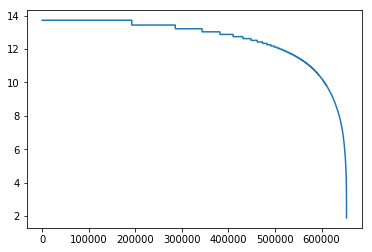

In [18]:
plt.plot(sorted(features_idf.idf_, reverse=True))
plt.show()

## Documents with high IDF or TFIDF

In [19]:
print(type(tfidf_matrix))
print(tfidf_matrix.shape)

print(len(tfidf_matrix.data)/1000000)
print(len(idf_matrix.data)/1000000)

<class 'scipy.sparse.csr.csr_matrix'>
(1000000, 653710)
145.109437
145.109437


In [20]:
print(idf_matrix[:,0])
print(idf_matrix[0,:])

  (11, 0)	4.144094080424015
  (66, 0)	4.144094080424015
  (67, 0)	4.144094080424015
  (78, 0)	4.144094080424015
  (86, 0)	4.144094080424015
  (105, 0)	4.144094080424015
  (115, 0)	4.144094080424015
  (119, 0)	4.144094080424015
  (147, 0)	4.144094080424015
  (197, 0)	4.144094080424015
  (223, 0)	4.144094080424015
  (237, 0)	4.144094080424015
  (244, 0)	4.144094080424015
  (263, 0)	4.144094080424015
  (264, 0)	4.144094080424015
  (310, 0)	4.144094080424015
  (323, 0)	4.144094080424015
  (366, 0)	4.144094080424015
  (374, 0)	4.144094080424015
  (376, 0)	4.144094080424015
  (394, 0)	4.144094080424015
  (397, 0)	4.144094080424015
  (406, 0)	4.144094080424015
  (430, 0)	4.144094080424015
  (436, 0)	4.144094080424015
  :	:
  (999385, 0)	4.144094080424015
  (999406, 0)	4.144094080424015
  (999409, 0)	4.144094080424015
  (999418, 0)	4.144094080424015
  (999438, 0)	4.144094080424015
  (999453, 0)	4.144094080424015
  (999480, 0)	4.144094080424015
  (999482, 0)	4.144094080424015
  (999489, 0)	4.14

### Look at top 10 IDF terms and their TFIDF  

In [21]:
# length_list = []
# Row -> Document, Column -> Term

for i in progress_bar.iter_progress(range(idf_matrix.shape[0])):
    if i==10:
        break
    idf_row = idf_matrix.getrow(i) # this is a 1 x 659255 csr matrix
    tfidf_row = tfidf_matrix.getrow(i) # this is a 1 x 659255 csr matrix
    top10Terms_tfidf_idx = tfidf_row.data.argsort()[::-1][:10] # index of top 10 terms in the small array with nonzeros 
    top10Terms_idf_idx = idf_row.data.argsort()[::-1][:10]
    
#     print(row.data) # give only nonzero values so the array is much less than 659255, e.g. 30
#     print(row.indices) # gives the actual indices of the non zero terms
    
    print("-----------------")
    print("Document: ",i)
    print()
    
    print("Top 10 Highest IDF")
    print(top10Terms_idf_idx)
    print([inv_vocab[term_id] for term_id in idf_row.indices[top10Terms_idf_idx]])
    print(idf_row.indices[top10Terms_idf_idx])
    print("IDF values: ",idf_row.data[top10Terms_idf_idx])
    print("TFIDF values: ", tfidf_row.data[top10Terms_idf_idx])
    print()
    
    print("Top 10 Highest TFIDF")
    print(top10Terms_tfidf_idx)
    print([inv_vocab[term_id] for term_id in tfidf_row.indices[top10Terms_tfidf_idx]])
    print(tfidf_row.indices[top10Terms_tfidf_idx])
    print("TFIDF values: ", tfidf_row.data[top10Terms_tfidf_idx])
    print("IDF values: ", idf_row.data[top10Terms_tfidf_idx])
    print()

VBox(children=(HTML(value='0 / 1000000 items . Rate ?/s . Remaining ?s . Elapsed 0.0s'), IntProgress(value=0, max=1000000)))

-----------------
Document:  0

Top 10 Highest IDF
[ 16 119 106  24 100  93  56  10  73   1]
['foregate', 'comradery', 'snowballed', 'socialise', 'hardman', 'bromsgrove', 'droitwich', 'bellies', 'hospitable', 'saluted']
[249327 174941 545111 545650 282975 140287 212377 120826 296116 515640]
IDF values:  [11.41431418 11.28915103  9.88825787  9.75926575  9.72176136  9.59515573
  9.55282137  9.4310165   9.22452458  9.22452458]
TFIDF values:  [ 9.88825787  2.87996237 11.28915103 11.32035389  4.14855817  4.84137917
  5.61431284  4.45634118  5.98132024  3.50602506]

Top 10 Highest TFIDF
[  5 108 118 115   0  37  33 107  89 137]
['veterans', 'club', 'breakfast', 'carney', 'worcester', 'postal', 'pub', 'clubs', 'forces', '10am']
[614078 169694 137990 152153 633683 469930 480946 169758 249202   5574]
TFIDF values:  [41.36382706 29.57990035 28.6068399  24.80187737 22.38152891 22.28340696
 19.87796834 17.23847664 14.30727953 13.53856491]
IDF values:  [5.05439435 4.66301779 8.54452313 8.84170195 5

###### this is the list with the length of each document! 1000000
len(length_list)
np.mean(length_list)
np.std(length_list)

MEAN: 146.929484

STD DEV: 125.54370629184781

## Position of High terms in Docs

In [22]:
# do some regression to find alpha for each (buckets with freqs?)

# as described here: https://www.nltk.org/_modules/nltk/tokenize.html
# the default analyzer used in scikit is called "word": 
# https://towardsdatascience.com/hacking-scikit-learns-vectorizers-9ef26a7170af

def find_positions_term(term, token_text):
    pos = [k for k,v in enumerate(token_text) if v==term]
    return pos

def find_positions_termlist(terms, token_text):
    term_set = set(terms)
    pos = [k for k,v in enumerate(token_text) if v in term_set]
    return pos

In [23]:
analyzer = tfidf_vectorizer.build_analyzer()

#### Top 10 TFIDF terms per document

In [24]:
for i in progress_bar.iter_progress(range(idf_matrix.shape[0])):
    if i==10:
        break
    idf_row = idf_matrix.getrow(i) # this is a 1 x 659255 csr matrix
    tfidf_row = tfidf_matrix.getrow(i) # this is a 1 x 659255 csr matrix
    top10Terms_tfidf_idx = tfidf_row.data.argsort()[::-1][:10] # index of top 10 terms in the small array with nonzeros 
    top10Terms_idf_idx = idf_row.data.argsort()[::-1][:10]
    
    # find the positions of high idf/tfidf terms in the text
    top_10_terms = [inv_vocab[term_id] for term_id in tfidf_row.indices[top10Terms_tfidf_idx]]
    print(top_10_terms)
    
    # inside the document
    print(i) # i is the document index
    all_text = dataset["content"].iloc[i]
    token_text = analyzer(all_text.lower())  
    print(len(token_text))
    
    all_pos = []
    for term in top_10_terms[:5]:
        pos = find_positions_term(term, token_text)
        print(pos)
        all_pos.extend(pos)
   
    print()
    print()

VBox(children=(HTML(value='0 / 1000000 items . Rate ?/s . Remaining ?s . Elapsed 0.0s'), IntProgress(value=0, max=1000000)))

['veterans', 'club', 'breakfast', 'carney', 'worcester', 'postal', 'pub', 'clubs', 'forces', '10am']
0
194
[0, 16, 27, 73, 124, 147, 174]
[4, 13, 24, 47, 109, 123, 187]
[3, 12, 108, 122, 186]
[40, 89, 139]
[2, 11, 45]


['jumpshot', 'marketers', 'data', 'keywords', 'search', 'real', 'conversions', 'clicks', 'organic', 'online']
1
349
[20, 37, 59, 94, 130, 142, 160, 210, 251, 270, 271, 291, 304, 313]
[3, 40, 48, 77, 100, 215, 293]
[12, 26, 104, 119, 126, 147, 167, 216, 220, 232, 259, 268]
[6, 68, 79, 88, 179, 198]
[52, 62, 72, 75, 82, 139, 150]


['basketball', 'nike', 'sensation', 'max', 'googlefacebooktwitter', 'fan', 'kicksonfire', 'hyped', 'air', 'retro']
2
59
[14, 22, 26]
[3, 42]
[6, 45]
[5, 44]
[58]


['cut', 'fashion', 'tweet', 'shares', 'share', 'style', 'dating', 'polly', 'street', 'yeezy']
3
976
[5, 54, 384, 616, 621, 627, 631, 639, 644, 652, 659, 666, 672, 677, 685, 692, 700, 707, 712, 719, 724, 732, 738, 743, 749, 755, 761, 768, 769, 775, 783, 787, 793, 799, 805, 811, 817, 8

#### Histograms for top 5 TFIDF terms per document

DENSITY:

n, bins, patches = plt.hist(values, 10, density=True)

assert np.sum(n*np.diff(bins)) == 1

In [25]:
def plot_hist(values, n_bins=10, show=False):


    n, bins, patches = plt.hist(values, n_bins, density=False, weights=np.ones(len(values)) / len(values))
#     assert sum(n)==1.0
    print("SUM:", sum(n))

    plt.xlabel('Position')
    plt.ylabel('Probability')
    plt.title('Histogram')
    plt.grid(True)
    if show:
        plt.show()
    
    return n, bins

VBox(children=(HTML(value='0 / 1000000 items . Rate ?/s . Remaining ?s . Elapsed 0.0s'), IntProgress(value=0, max=1000000)))

0
['veterans', 'club', 'breakfast', 'carney', 'worcester']
SUM: 1.0


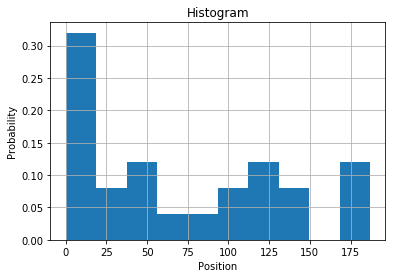

[0.32 0.08 0.12 0.04 0.04 0.08 0.12 0.08 0.   0.12] 1.0

1
['jumpshot', 'marketers', 'data', 'keywords', 'search']
SUM: 1.0


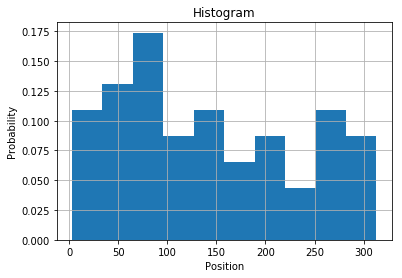

[0.10869565 0.13043478 0.17391304 0.08695652 0.10869565 0.06521739
 0.08695652 0.04347826 0.10869565 0.08695652] 1.0

2
['basketball', 'nike', 'sensation', 'max', 'googlefacebooktwitter']
SUM: 1.0


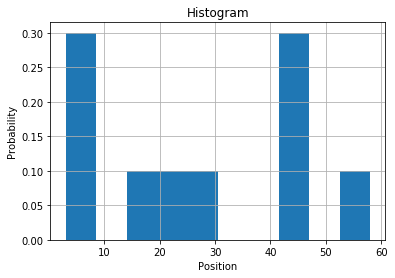

[0.3 0.  0.1 0.1 0.1 0.  0.  0.3 0.  0.1] 1.0

3
['cut', 'fashion', 'tweet', 'shares', 'share']
SUM: 0.9999999999999998


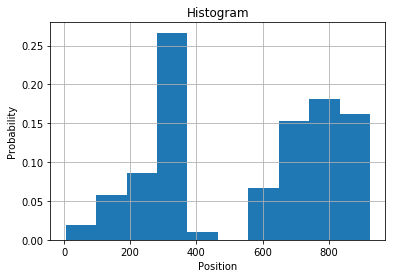

[0.01904762 0.05714286 0.08571429 0.26666667 0.00952381 0.
 0.06666667 0.15238095 0.18095238 0.16190476] 0.9999999999999998

4
['bersih', 'lumpur', 'kuala', 'loga', 'mysinchew']
SUM: 1.0


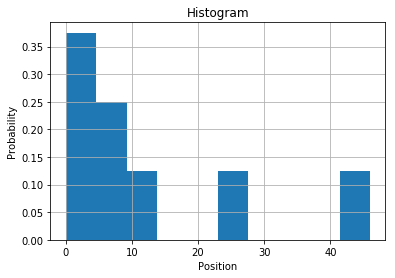

[0.375 0.25  0.125 0.    0.    0.125 0.    0.    0.    0.125] 1.0

5
['rial', 'dollar', 'rupee', 'dinar', 'krone']
SUM: 1.0


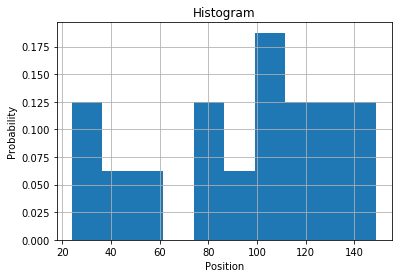

[0.125  0.0625 0.0625 0.     0.125  0.0625 0.1875 0.125  0.125  0.125 ] 1.0

6
['words', 'influence', 'life', 'proverbs', 'death']
SUM: 1.0


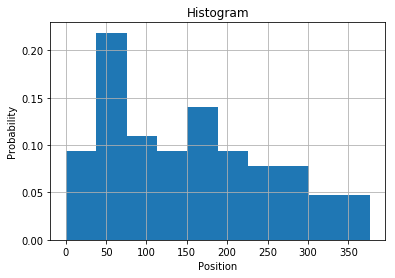

[0.09375  0.21875  0.109375 0.09375  0.140625 0.09375  0.078125 0.078125
 0.046875 0.046875] 1.0

7
['ipad', 'apple', 'siri', 'screen', 'remote']
SUM: 1.0


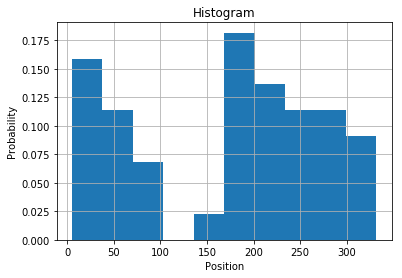

[0.15909091 0.11363636 0.06818182 0.         0.02272727 0.18181818
 0.13636364 0.11363636 0.11363636 0.09090909] 1.0

8
['harwood', 'feffer', 'vasco', 'llp', '300149371']
SUM: 1.0


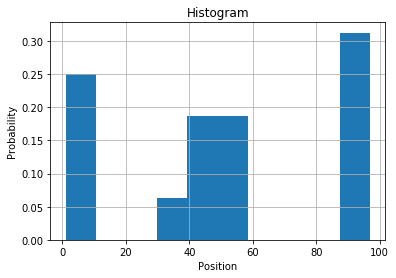

[0.25   0.     0.     0.0625 0.1875 0.1875 0.     0.     0.     0.3125] 1.0

9
['credlin', 'loughnane', 'abbott', 'mr', 'prime']
SUM: 1.0


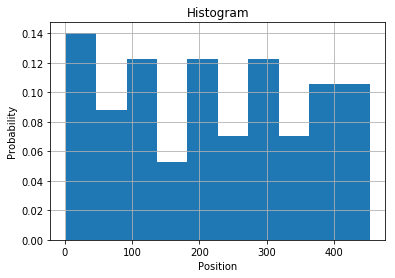

[0.14035088 0.0877193  0.12280702 0.05263158 0.12280702 0.07017544
 0.12280702 0.07017544 0.10526316 0.10526316] 1.0

10
['pitt', 'narduzzi', 'game', 'ysu', 'll']
SUM: 1.0


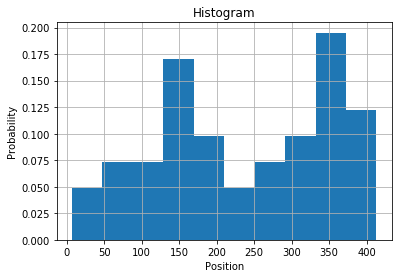

[0.04878049 0.07317073 0.07317073 0.17073171 0.09756098 0.04878049
 0.07317073 0.09756098 0.19512195 0.12195122] 1.0

11
['tradingcharts', 'data', 'market', 'exchange', 'marketintelligencecenter']
SUM: 1.0


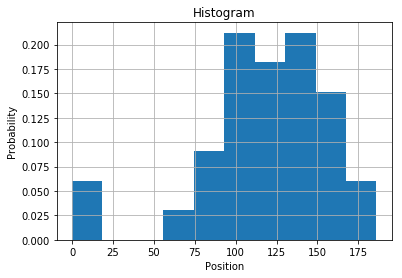

[0.06060606 0.         0.         0.03030303 0.09090909 0.21212121
 0.18181818 0.21212121 0.15151515 0.06060606] 1.0

12
['emails', 'clinton', 'petraeus', 'department', 'chain']
SUM: 1.0


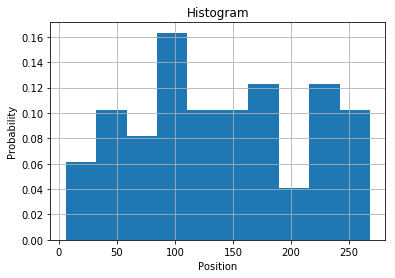

[0.06122449 0.10204082 0.08163265 0.16326531 0.10204082 0.10204082
 0.12244898 0.04081633 0.12244898 0.10204082] 1.0

13
['andujar', 'dominican', 'cardinals', 'joaquin', 'league']
SUM: 1.0


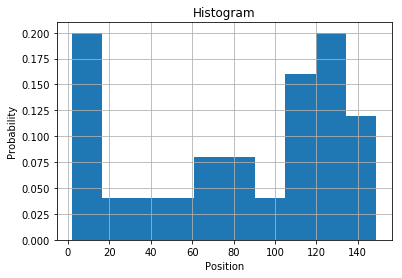

[0.2  0.04 0.04 0.04 0.08 0.08 0.04 0.16 0.2  0.12] 1.0

14
['texas', 'nutall', 'mcdowell', 'touchdown', 'yard']
SUM: 1.0


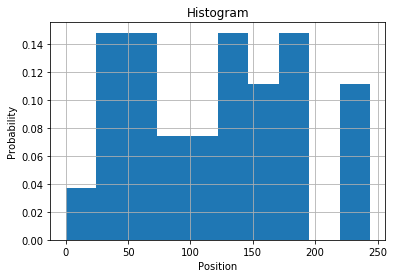

[0.03703704 0.14814815 0.14814815 0.07407407 0.07407407 0.14814815
 0.11111111 0.14814815 0.         0.11111111] 1.0

15
['mail', 'rioters', 'patrols', 'daily', 'warn']
SUM: 0.9999999999999999


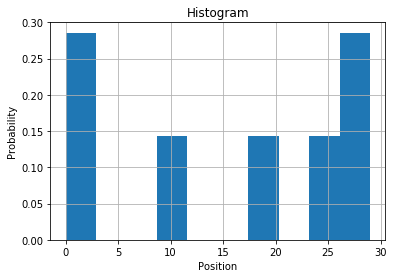

[0.28571429 0.         0.         0.14285714 0.         0.
 0.14285714 0.         0.14285714 0.28571429] 0.9999999999999999

16
['promises', 'tanzanians', 'candidates', 'politicians', 'money']
SUM: 1.0


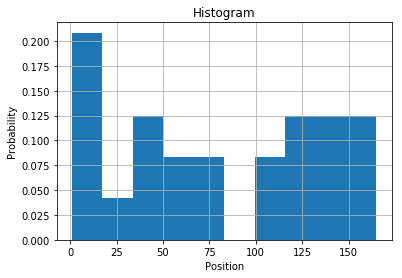

[0.20833333 0.04166667 0.125      0.08333333 0.08333333 0.
 0.08333333 0.125      0.125      0.125     ] 1.0

17
['corbyn', 'watson', 'tory', 'est', 'sniggers']
SUM: 1.0


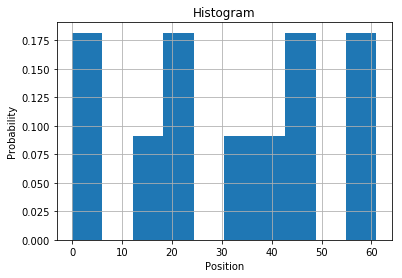

[0.18181818 0.         0.09090909 0.18181818 0.         0.09090909
 0.09090909 0.18181818 0.         0.18181818] 1.0

18
['deputies', 'helicopter', 'sheriff', 'suspect', 'freeway']
SUM: 1.0000000000000002


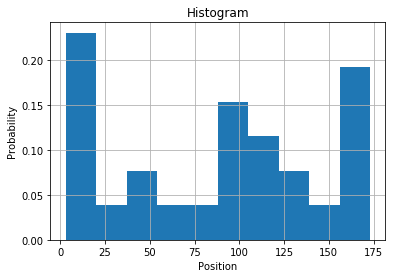

[0.23076923 0.03846154 0.07692308 0.03846154 0.03846154 0.15384615
 0.11538462 0.07692308 0.03846154 0.19230769] 1.0000000000000002

19
['cancer', 'research', 'phrma', 'alex', 'foundation']
SUM: 0.9999999999999999


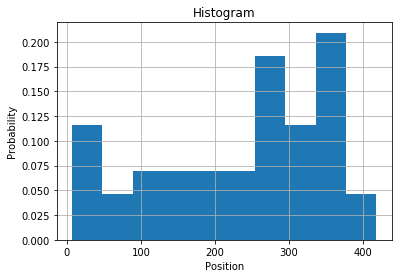

[0.11627907 0.04651163 0.06976744 0.06976744 0.06976744 0.06976744
 0.18604651 0.11627907 0.20930233 0.04651163] 0.9999999999999999

[0.16607486 0.07450914 0.08365212 0.08485583 0.0746513  0.08857872
 0.09727493 0.10607315 0.09325648 0.13107348]
1.0


In [26]:
cum_sum = np.zeros(10)

for i in progress_bar.iter_progress(range(idf_matrix.shape[0])):
    if i==20:
        break
    print(i) # i is the document index
        
    #idf_row = idf_matrix.getrow(i) # this is a 1 x 659255 csr matrix
    tfidf_row = tfidf_matrix.getrow(i) # this is a 1 x 659255 csr matrix
    top10Terms_tfidf_idx = tfidf_row.data.argsort()[::-1][:10] # index of top 10 terms in the small array with nonzeros 
    #top10Terms_idf_idx = idf_row.data.argsort()[::-1][:10]
    
    # find the positions of high idf/tfidf terms in the text
    top_10_terms = [inv_vocab[term_id] for term_id in tfidf_row.indices[top10Terms_tfidf_idx]]
    print(top_10_terms[:5])
    
    # inside the document
    all_text = dataset["content"].iloc[i]
    token_text = analyzer(all_text.lower())
    
    all_pos = []
    for term in top_10_terms[:5]:
        pos = find_positions_term(term, token_text)
        all_pos.extend(pos)
    
    n, bins = plot_hist(np.array(sorted(all_pos)), show=True)
    cum_sum += n
    print(n,sum(n))
    print()
    
print(cum_sum/20)
print(sum(cum_sum/20))

### Average distribution for all docs

In [27]:
def getDistributionForRows(row_idxs, matrix, dataset, num_passage=10):
    cum_sum = np.zeros(num_passage)
    #for i in progress_bar.iter_progress(row_idxs):
    for i in row_idxs:

        row = matrix.getrow(i) # this is a 1 x 659255 csr matrix
        top10Terms_idx = row.data.argsort()[::-1][:10]

        # find the positions of high idf/tfidf terms in the text
        top_10_terms = [inv_vocab[term_id] for term_id in row.indices[top10Terms_idx]]

        # inside the document
        all_text = dataset["content"].iloc[i]
        token_text = analyzer(all_text.lower())

        all_pos = find_positions_termlist(top_10_terms[:5], token_text)
        all_pos.append(len(token_text))
        n,_ = np.histogram(all_pos, bins=num_passage, density=False, weights=np.ones(len(all_pos)) / len(all_pos))
        cum_sum += n

    return cum_sum/len(row_idxs) 

#### IDF

In [28]:
getDistributionForRows(range(idf_matrix.shape[0]), idf_matrix, dataset)

# [ 0.21536741  0.07443482  0.0717614   0.06874424  0.06757452  0.0709799
#  0.06936171  0.06951786  0.07363883  0.21861932]

array([0.21536741, 0.07443482, 0.0717614 , 0.06874424, 0.06757452,
       0.0709799 , 0.06936171, 0.06951786, 0.07363883, 0.21861932])

In [29]:
# for num_passage in [2,4,8,16]:
for num_passage in [16]:
    distrib = getDistributionForRows(range(idf_matrix.shape[0]), idf_matrix, dataset, num_passage)
    print("Num passage", num_passage)
    print(distrib)

Num passage 16
[0.18571483 0.04908335 0.04662304 0.04408456 0.04492105 0.04306409
 0.04319432 0.04119713 0.04532807 0.04318855 0.04320062 0.04283702
 0.04489028 0.04546786 0.04808368 0.18912153]


#### TFIDF

In [41]:
getDistributionForRows(range(tfidf_matrix.shape[0]), tfidf_matrix, dataset)

# [ 0.16176254  0.09472742  0.09135097  0.08879455  0.0870066   0.09013596
#  0.0879273   0.08500273  0.08299202  0.13029989]

array([0.16176254, 0.09472742, 0.09135097, 0.08879455, 0.0870066 ,
       0.09013596, 0.0879273 , 0.08500273, 0.08299202, 0.13029989])

In [42]:
# for num_passage in [8,16]:
# #     distrib = getDistributionForRows(range(tfidf_matrix.shape[0]), tfidf_matrix, dataset, num_passage)
#     print("Num passage", num_passage)
#     print(distrib)

#### See the distribution of document lengths - histo with 20 bins? 

In [43]:
doc_len = []

for i in progress_bar.iter_progress(range(idf_matrix.shape[0])):
    # inside the document
    all_text = dataset["content"].iloc[i]
    token_text = analyzer(all_text.lower())
    doc_len.append(len(token_text))

VBox(children=(HTML(value='0 / 1000000 items . Rate ?/s . Remaining ?s . Elapsed 0.0s'), IntProgress(value=0, max=1000000)))

In [44]:
print("Average document length: ",np.mean(doc_len))

Average document length:  224.215573


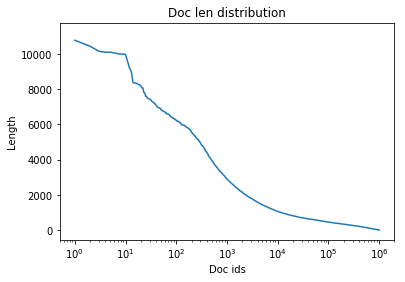

In [45]:
plt.semilogx(sorted(doc_len, reverse=True))
plt.title("Doc len distribution")
plt.xlabel("Doc ids")
plt.ylabel("Length")
plt.show()

In [46]:
np.histogram(doc_len, bins=10)  #, density=False, weights=np.ones(len(doc_len)) / len(doc_len))

(array([991198,   7015,   1071,    335,    185,    138,     35,      9,
             9,      5]),
 array([    0. ,  1122.8,  2245.6,  3368.4,  4491.2,  5614. ,  6736.8,
         7859.6,  8982.4, 10105.2, 11228. ]))

In [47]:
#### see the distribution of articles with length smaller than 1000
a_max1000 = [x for x in doc_len if x<=1000]
np.histogram(a_max1000, bins=10)

(array([334203, 237057, 180391, 110374,  57140,  30897,  19895,   9028,
          5687,   3702]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]))

In [37]:
### Create a dict from doc length interval and index list
from collections import defaultdict

doc_len_index = defaultdict(list)
for idx, length in enumerate(doc_len):
    doc_len_index[int(length/100)].append(idx)

In [38]:
doc_len_index.keys()

dict_keys([1, 3, 0, 9, 4, 2, 10, 6, 17, 12, 11, 7, 8, 5, 27, 16, 52, 14, 26, 29, 13, 20, 15, 31, 19, 18, 33, 23, 57, 24, 30, 50, 28, 25, 61, 32, 21, 38, 22, 39, 34, 65, 40, 48, 72, 42, 58, 73, 47, 69, 36, 54, 49, 80, 37, 43, 35, 53, 44, 41, 100, 46, 66, 56, 70, 59, 51, 101, 55, 63, 68, 64, 75, 104, 62, 60, 45, 74, 77, 82, 90, 83, 71, 67, 107, 95, 112, 78, 99, 92])

In [39]:
result_dict=dict()
for len_interval, idx_list in doc_len_index.items():
    v = getDistributionForRows(idx_list, tfidf_matrix, dataset)
    result_dict[len_interval]=v

In [40]:
for k,v in result_dict.items():
    interval = "Interval: [" + str(k*100) + "-" + str(k*100+100) +")"
    print(interval, "| #", len(doc_len_index[k]), "documents")
    print(v)
    print()

Interval: [100-200) | # 237057 documents
[0.16136574 0.09785744 0.09301447 0.09004245 0.08899131 0.0912055
 0.0877989  0.08481957 0.08222813 0.12267649]

Interval: [300-400) | # 110374 documents
[0.14087671 0.10060016 0.09636052 0.09558817 0.09410044 0.09506545
 0.09429025 0.0920869  0.0866107  0.1044207 ]

Interval: [0-100) | # 334203 documents
[0.189193   0.08520249 0.08329569 0.07932924 0.07643277 0.08290069
 0.08007387 0.07681443 0.07928606 0.16747177]

Interval: [900-1000) | # 3681 documents
[0.12167941 0.10047539 0.10125426 0.10073969 0.09891918 0.09852337
 0.09656944 0.09372878 0.09109698 0.09701351]

Interval: [400-500) | # 57140 documents
[0.13570972 0.10062411 0.09806977 0.09719599 0.09540273 0.09630073
 0.09475363 0.09219446 0.08774726 0.10200161]

Interval: [200-300) | # 180391 documents
[0.14845057 0.10004219 0.0951859  0.09319213 0.09185818 0.09344167
 0.09280031 0.09034853 0.08439229 0.11028822]

Interval: [1000-1100) | # 2448 documents
[0.11972221 0.10038947 0.10259283 